In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Ej. 3

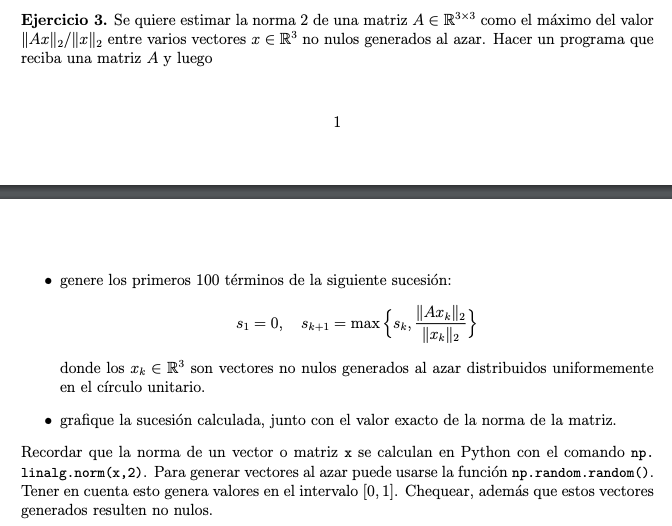

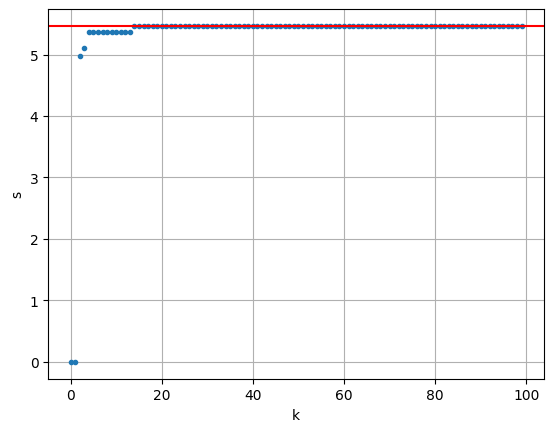

In [82]:
#Ej. 3
def Norma2(A):

    x = [np.random.random(A.shape[1]) for i in range(100)]
    x = [np.random.randint(0, 1001, size=A.shape[1]) for i in range(100)]
    s = np.zeros(100)
    s[0] = 0
    for i in range(1,100-1):
        s[i+1] = max(np.linalg.norm(A @ x[i],2)/ np.linalg.norm(x[i],2)    ,s[i])
    return s

A_test = np.array([[1, 2]
                , [3, 4]])

s = Norma2(A_test)
NormaA_exacta = np.linalg.norm(A_test,2)

plt.plot(s,'.')
plt.axhline(y=NormaA_exacta, color='r', linestyle='-')
plt.xlabel('k')
plt.ylabel('s')
plt.grid()
plt.show()

# Ej. 5

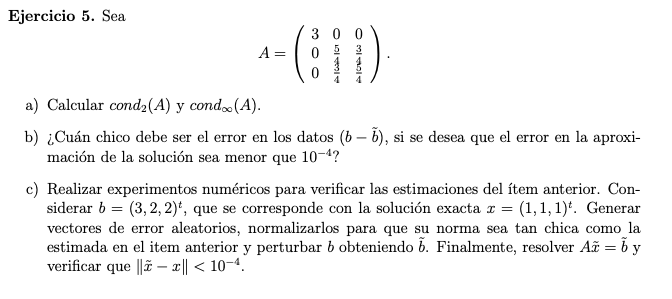

In [ ]:
#Ej. 5 a)
A = [[3,0,0],
     [0,5/4,3/4],
     [0,3/4,5/4]]

inv_A = np.linalg.inv(A)

cond2A = np.linalg.norm(A,2) * np.linalg.norm(inv_A,2)
cond_inf_A = np.linalg.norm(A, np.inf) * np.linalg.norm(inv_A, np.inf)

print(f"La cond_inf(A) = {cond_inf_A}")
print(f"La cond_2(A) = {cond2A}")

La cond_inf(A) = 6.0
La cond_2(A) = 5.999999999999999


# Ej. 11



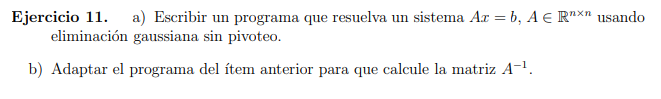

In [16]:
def gaussian_elimination(A, b):
    """
    Resuelve el sistema Ax = b usando eliminación gaussiana sin pivoteo.
    """
    n = len(A)
    A = A.astype(float)
    b = b.astype(float)

    # Eliminación hacia adelante
    for i in range(n):
        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

    return x

def inverse_matrix(A):
    """
    Calcula la inversa de A usando eliminación gaussiana sin pivoteo.
    """
    n = len(A)
    A = A.astype(float)  #
    I = np.eye(n)

    # Aplicamos eliminación gaussiana a cada columna de la identidad
    for i in range(n):
        e_i = I[:, i]
        A_inv_col = gaussian_elimination(A.copy(), e_i.copy())
        I[:, i] = A_inv_col

    return I

A = np.array([[3.0, 2.0, -4.0], [2.0, 3.0, 3.0], [5.0, -3.0, 1.0]])
b = np.array([3.0, 15.0, 14.0])

x = gaussian_elimination(A, b)
print("Solución x:", x)

A_inv = inverse_matrix(A)
print("Matriz inversa de A:")
print(A_inv)


Solución x: [3. 1. 2.]
Matriz inversa de A:
[[ 0.08219178  0.06849315  0.12328767]
 [ 0.0890411   0.15753425 -0.11643836]
 [-0.14383562  0.13013699  0.03424658]]


In [ ]:
#control + } comento cosas.

# Ejemplo analizando convergencia de Jacobi

In [23]:
b = 1

A = np.array([[-1, 1, 2], [4, -1, 3], [5, 6, -1]])
B = np.array([[0,b,0], [b,0,b], [0,b,0]])

D = np.diag(np.diag(A))

L_U = A - D

# Matriz de iteración M_Jacobi = D^-1 * (L + U)
D_inv = inverse_matrix(D)
M_Jacobi = np.dot(D_inv, L_U)

eigenvalues = np.linalg.eigvals(M_Jacobi)

spectral_radius = max(abs(eigenvalues))
spectral_radius

6.461435960330688

# Ej. 13 *Corregir...*

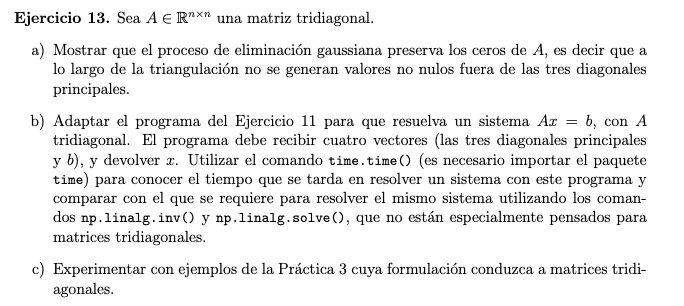

In [81]:
import time

def thomas_algorithm(a, b, c, d):

    n = len(b)
    # Eliminación hacia adelante
    for i in range(1, n):
        factor = a[i] / b[i-1]
        b[i] -= factor * c[i-1]
        d[i] -= factor * d[i-1]

    # Sustitución hacia atrás
    x = np.zeros(n)
    x[-1] = d[-1] / b[-1]
    for i in range(n-2, -1, -1):
        x[i] = (d[i] - c[i] * x[i+1]) / b[i]

    return x

a = np.array([0, 1, 1, 1])
b = np.array([3, 3, 3, 3])
c = np.array([2, 2, 2, 0])
d = np.array([6, 12, 18, 16])

# Thomas algorithm
start_time = time.time()
x_thomas = thomas_algorithm(a, b, c, d)
thomas_time = time.time() - start_time

# np.linalg.solve
n = len(b)
A = np.diag(a[1:], -1) + np.diag(b, 0) + np.diag(c[:-1], 1)
start_time = time.time()
x_solve = gaussian_elimination(A, d)
solve_time = time.time() - start_time

# np.linalg.inv
start_time = time.time()
A_inv = np.linalg.inv(A)
x_inv = A_inv @ d
inv_time = time.time() - start_time

print("Solution using Thomas algorithm:", x_thomas)
print("Time taken by Thomas algorithm:", thomas_time)
print("\nSolution using np.linalg.solve:", x_solve)
print("Time taken by np.linalg.solve:", solve_time)
print("\nSolution using np.linalg.inv:", x_inv)
print("Time taken by np.linalg.inv:", inv_time)

Solution using Thomas algorithm: [0.  3.  2.  4.5]
Time taken by Thomas algorithm: 0.00018787384033203125

Solution using np.linalg.solve: [ 2.00000000e+00 -2.66453526e-15  4.00000000e+00  2.50000000e+00]
Time taken by np.linalg.solve: 0.00022292137145996094

Solution using np.linalg.inv: [2.  0.  4.  2.5]
Time taken by np.linalg.inv: 0.004546403884887695
